In [56]:
from torchvision import transforms
from src.data.datasets import ImageNet100
from src.data.transform import Patchify
from functools import partial
import torch
import matplotlib.pyplot as plt
import numpy as np
from src.utils.image_utils import channel_last

In [49]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    Patchify(flatten_patch_dims=False),
])
ds = ImageNet100(is_train=False, transform=transform)

In [53]:
ds[3000]['image'].shape

torch.Size([1, 196, 3, 16, 16])

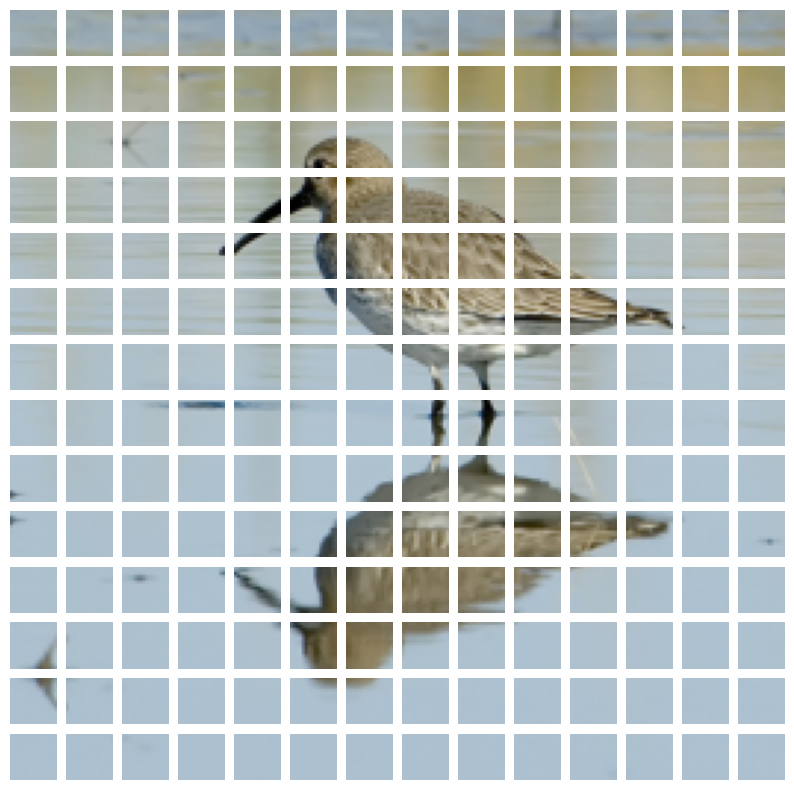

In [58]:
fig, axs = plt.subplots(14, 14, figsize=(10, 10))
axs = np.ravel(axs)
patches = np.squeeze(ds[3000]['image'].numpy())
for idx, ax in enumerate(axs):
    patch = channel_last(patches[idx, ...])
    ax.imshow(patch)
    ax.axis('off')